In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group1 = [10,11,12,13]
group2 = [15,16,17,18]
group3 = [19,20,21]
group4 = [24,25,28,29,30]
allGroups = group1+group2+group3+group4

bookings = pd.read_json("../ec_data/all_bookings27-7-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

allBookings = validBookings.loc[validBookings['user'].isin(allGroups)].copy()  

allBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00
36,2023-04-22 14:00:00+00:00,3600,dishwasher,this may not be necessary depends on how full...,yes,0.12,11,electricity_consumption,12,2023-04-21 08:47:31+00:00,2023-04-21 08:47:31+00:00
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09+00:00,2023-04-21 12:06:09+00:00
38,2023-04-21 15:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,More weekend preparation!,no,0.50,8,electricity_consumption,10,2023-04-21 14:54:01+00:00,2023-04-21 14:54:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
322,2023-07-27 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:54:19+00:00,2023-07-24 12:54:19+00:00
323,2023-07-24 17:00:00+00:00,3600,oven (60min),,yes,0.20,8,electricity_consumption,25,2023-07-24 14:29:42+00:00,2023-07-24 14:29:42+00:00
324,2023-07-25 09:30:00+00:00,5400,Other,Cooking (hob). I don't know how many kWh this ...,yes,1.00,2,electricity_consumption,24,2023-07-25 06:33:11+00:00,2023-07-25 06:33:11+00:00
325,2023-07-25 17:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-25 08:34:41+00:00,2023-07-25 08:34:41+00:00


266 bookings were made in total.
42 of those bookings were modified.


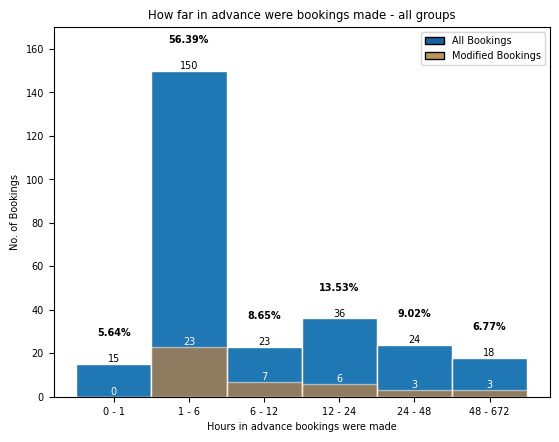

In [2]:
# Booking pattern for all groups

# How far in advance were bookings made?

# Also shows how many bookings were modified

allBookings['diff'] = (allBookings['start'] - allBookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(allBookings['diff'],bins)

# make modified bookings histogram
modified_bookings = allBookings['diff'].where(allBookings['modified_at'] > allBookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - all groups")

# Create legend
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(allBookings)
print(total_bookings, 'bookings were made in total.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 12, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [12]:
#Group 1

g1Bookings = bookings.loc[bookings['user'].isin(group1)].copy()
g1Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
19,2023-04-02 08:00:00+00:00,1800,lighting (We are in the kitchen. It is getting...,,no,0.15,8,electricity_consumption,10,2023-03-29 17:47:00+00:00,2023-03-29 17:47:00+00:00
24,2023-04-07 09:00:00+00:00,3600,\n Activity Type\n ...,Hoovering. It's a Friday thing! Probably for 3...,yes,1.00,8,electricity_consumption,10,2023-04-07 08:01:49+00:00,2023-04-07 08:01:49+00:00
25,2023-04-08 15:00:00+00:00,16200,oven (the oven is on and also the computer and...,roasting half a leg of lamb slowly,yes,0.78,11,electricity_consumption,12,2023-04-07 11:18:54+00:00,2023-04-07 10:13:53+00:00
26,2023-04-07 12:08:00+00:00,5400,washing_and_drying,making use of sun to dry clothes,no,0.26,11,electricity_consumption,12,2023-04-07 11:22:13+00:00,2023-04-07 07:20:53+00:00
27,2023-04-08 15:00:00+00:00,18000,oven (the oven is on and also the computer and...,roasting half a lamb,yes,0.78,11,electricity_consumption,12,2023-04-07 11:23:47+00:00,2023-04-07 11:23:47+00:00
...,...,...,...,...,...,...,...,...,...,...,...
132,2023-05-11 12:30:00+00:00,1800,toaster (Afternoon snack before working at lap...,I want the oven for 30 minutes but that isn't...,somewhat,0.23,8,electricity_consumption,10,2023-05-11 09:53:50+00:00,2023-05-11 09:53:50+00:00
136,2023-05-11 19:00:00+00:00,3600,oven (Baking),,somewhat,0.70,8,electricity_consumption,10,2023-05-11 11:52:50+00:00,2023-05-11 11:52:50+00:00
137,2023-05-12 09:00:00+00:00,7200,dishwasher (30min),,no,0.44,10,electricity_consumption,11,2023-05-12 07:44:33+00:00,2023-05-12 07:44:33+00:00
138,2023-05-12 10:00:00+00:00,3600,washing_and_drying (30min),,no,0.29,10,electricity_consumption,11,2023-05-12 07:45:19+00:00,2023-05-12 06:45:09+00:00


92 bookings were made by Group 1.
22 of those bookings were modified.


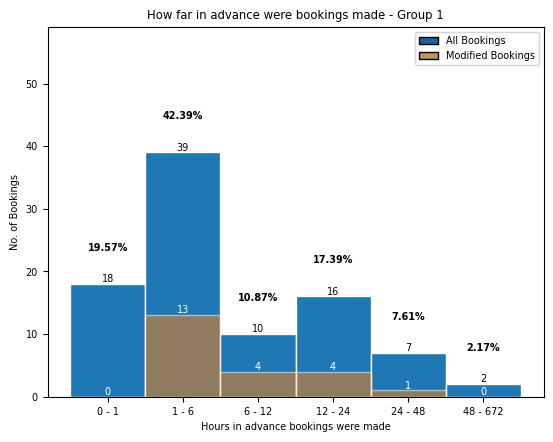

In [13]:
# Booking pattern for group 1

# How far in advance was a booking made in hours?
g1Bookings['diff'] = (g1Bookings['start'] - g1Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g1Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g1Bookings['diff'].where(g1Bookings['modified_at'] > g1Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g1Bookings)
print(total_bookings, 'bookings were made by Group 1.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 1 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [31]:
pp = g1Bookings.groupby('user')['diff']
# ff = pp.agg({'measurement':'count'})
pp.plot.hist(legend=True)


g1Bookings['diff'].hist(by=g1Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [14]:
#Group 2

g2Bookings = bookings.loc[bookings['user'].isin(group2)].copy()
g2Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
140,2023-06-05 19:00:00+00:00,1800,hob (30min),"I wanted to put the oven on for dinner, but t...",yes,0.06,11,electricity_consumption,17,2023-06-05 17:33:43+00:00,2023-06-05 09:28:51+00:00
141,2023-06-05 20:00:00+00:00,1800,watching_tv (30min),noted : I think that might use all the solar i...,yes,0.20,11,electricity_consumption,17,2023-06-05 17:36:20+00:00,2023-06-05 16:35:05+00:00
142,2023-06-10 09:00:00+00:00,3600,washing_and_drying (30min),Totally flexible but thought I'd get in there ...,yes,0.48,14,electricity_consumption,15,2023-06-08 17:25:05+00:00,2023-06-06 05:15:53+00:00
143,2023-06-06 10:00:00+00:00,1800,washing_and_drying (30min),,no,0.67,8,electricity_consumption,16,2023-06-06 08:51:46+00:00,2023-06-06 08:51:46+00:00
144,2023-06-06 10:20:00+00:00,1800,oven (30min),,no,0.53,11,electricity_consumption,17,2023-06-06 09:17:56+00:00,2023-06-06 09:17:56+00:00
...,...,...,...,...,...,...,...,...,...,...,...
283,2023-06-27 14:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:06+00:00,2023-06-27 12:05:06+00:00
284,2023-06-27 15:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:29+00:00,2023-06-27 12:05:29+00:00
285,2023-06-27 16:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:42+00:00,2023-06-27 11:05:30+00:00
286,2023-06-28 13:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-28 10:54:30+00:00,2023-06-28 10:54:30+00:00


115 bookings were made by Group 2.
18 of those bookings were modified.


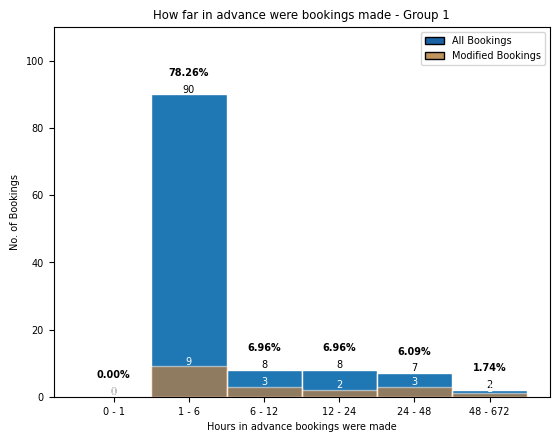

In [15]:
# Booking pattern for group 2

# How far in advance was a booking made in hours?
g2Bookings['diff'] = (g2Bookings['start'] - g2Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g2Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g2Bookings['diff'].where(g2Bookings['modified_at'] > g2Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g2Bookings)
print(total_bookings, 'bookings were made by Group 2.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 2 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

array([[<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>],
       [<Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>]],
      dtype=object)

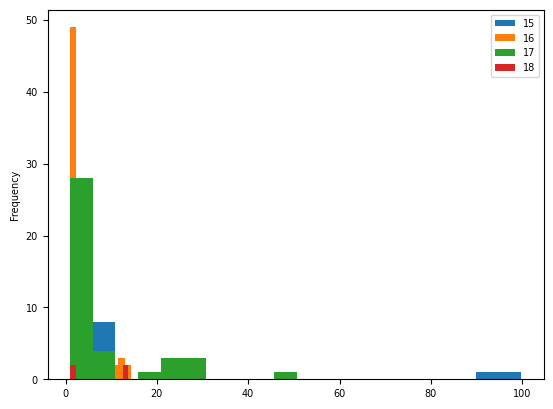

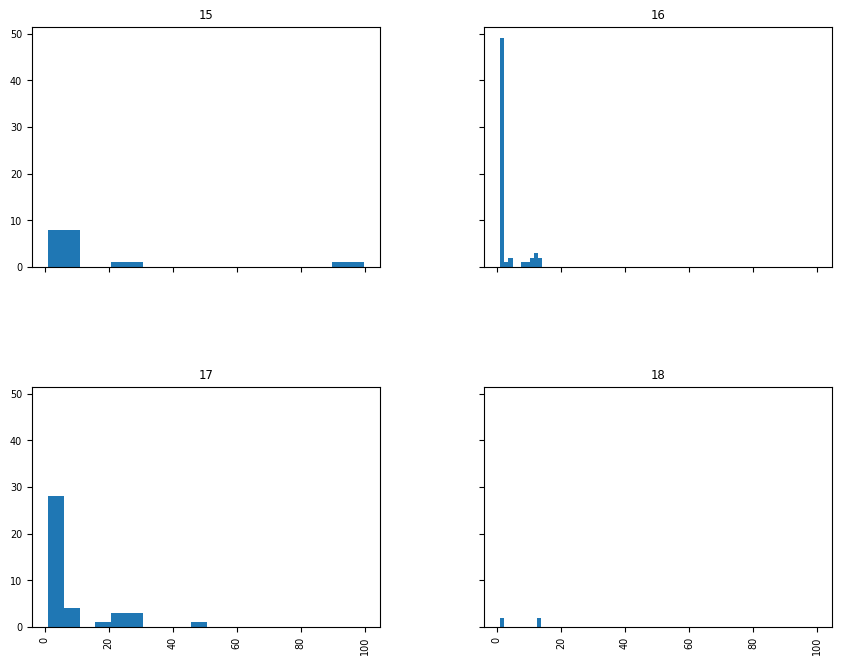

In [28]:
pp = g2Bookings.groupby('user')['diff']
# ff = pp.agg({'measurement':'count'})
pp.plot.hist(legend=True)


g2Bookings['diff'].hist(by=g2Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [16]:
#Group 3

g3Bookings = bookings.loc[bookings['user'].isin(group3)].copy()
g3Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
240,2023-06-20 15:15:00+00:00,1800,watching_tv (30min),I can watch the TV Later in the day but my fav...,somewhat,0.05,16,electricity_consumption,20,2023-06-20 14:13:57+00:00,2023-06-20 14:13:57+00:00
242,2023-06-20 18:00:00+00:00,1800,other (30min),Using HOB for dinner.,no,0.05,16,electricity_consumption,20,2023-06-20 16:50:42+00:00,2023-06-20 16:50:42+00:00
245,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:41:28+00:00,2023-06-21 14:41:28+00:00
246,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:41:47+00:00,2023-06-21 14:41:47+00:00
247,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:42:13+00:00,2023-06-21 14:42:13+00:00
248,2023-06-22 16:30:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:44:05+00:00,2023-06-21 14:44:05+00:00
249,2023-06-21 22:00:00+00:00,5400,dishwasher (90min),,yes,0.86,5,electricity_consumption,21,2023-06-21 17:08:30+00:00,2023-06-21 17:08:30+00:00
250,2023-06-21 19:00:00+00:00,1800,hob (30min),,yes,0.52,5,electricity_consumption,21,2023-06-21 17:09:31+00:00,2023-06-21 17:09:31+00:00
252,2023-06-22 10:00:00+00:00,5400,dishwasher (30min),I'd like to do this while Im out - leaving at...,somewhat,0.05,15,electricity_consumption,19,2023-06-22 08:36:35+00:00,2023-06-22 08:36:35+00:00
257,2023-06-24 15:52:00+00:00,3600,other (30min),Ps4 being used with TV,somewhat,0.05,16,electricity_consumption,20,2023-06-24 14:51:12+00:00,2023-06-24 14:51:12+00:00


40 bookings were made by Group 3.
2 of those bookings were modified.


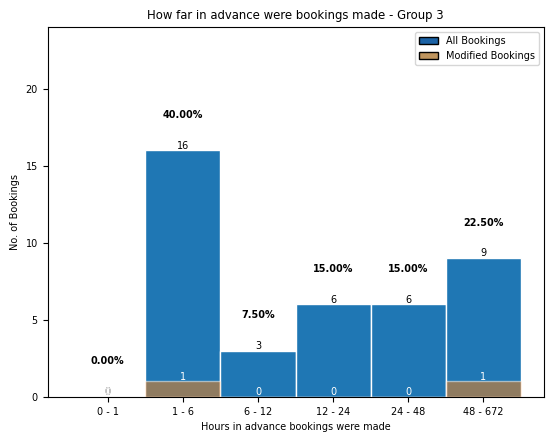

In [17]:
# Booking pattern for group 3

# How far in advance was a booking made in hours?
g3Bookings['diff'] = (g3Bookings['start'] - g3Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g3Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g3Bookings['diff'].where(g3Bookings['modified_at'] > g3Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g3Bookings)
print(total_bookings, 'bookings were made by Group 3.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 3 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 8  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

array([[<Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>],
       [<Axes: title={'center': '21'}>, <Axes: >]], dtype=object)

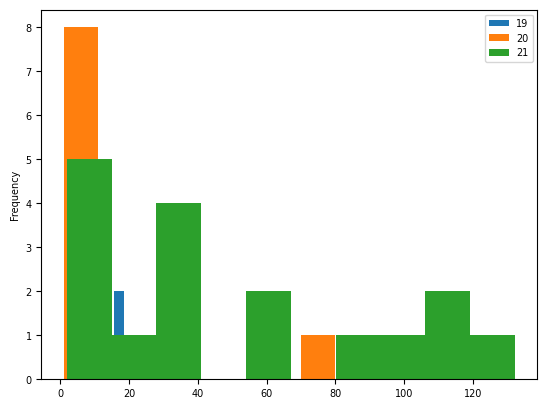

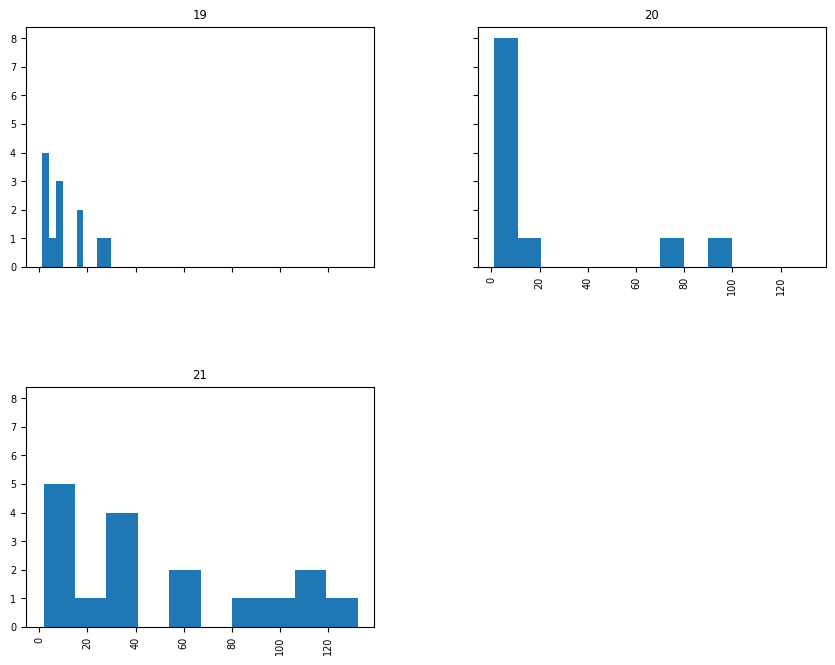

In [29]:
pp = g3Bookings.groupby('user')['diff']
# ff = pp.agg({'measurement':'count'})
pp.plot.hist(legend=True)


g3Bookings['diff'].hist(by=g3Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [18]:
#Group 4

g4Bookings = bookings.loc[bookings['user'].isin(group4)].copy()
g4Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
298,2023-07-08 14:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-07 17:34:49+00:00,2023-07-07 17:34:49+00:00
299,2023-07-20 08:00:00+00:00,3600,washing_and_drying (60min),,yes,0.34,16,electricity_consumption,28,2023-07-19 19:10:16+00:00,2023-07-19 19:10:16+00:00
300,2023-07-20 09:00:00+00:00,1800,toaster (30min),,yes,0.07,16,electricity_consumption,28,2023-07-19 19:19:44+00:00,2023-07-19 19:19:44+00:00
301,2023-07-21 09:00:00+00:00,1800,kettle (30min),,yes,0.04,8,electricity_consumption,25,2023-07-19 23:12:27+00:00,2023-07-19 23:12:27+00:00
302,2023-07-20 14:00:00+00:00,1800,other (30min),making smoothies,yes,0.39,16,electricity_consumption,28,2023-07-20 11:16:33+00:00,2023-07-20 11:16:33+00:00
303,2023-07-20 14:00:00+00:00,5400,Other,Using food chopper and hob (I am cooking),yes,1.00,2,electricity_consumption,24,2023-07-20 11:42:28+00:00,2023-07-20 09:41:20+00:00
304,2023-07-20 18:30:00+00:00,1800,Other,dinner,no,1.00,2,electricity_consumption,24,2023-07-20 14:31:15+00:00,2023-07-20 14:31:15+00:00
305,2023-07-21 08:00:00+00:00,1800,meal_dinner (30min),,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:33+00:00,2023-07-20 16:28:33+00:00
306,2023-07-22 08:00:00+00:00,3600,Other,,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:47+00:00,2023-07-20 16:28:47+00:00
307,2023-07-24 08:00:00+00:00,9000,Other,Laundry (2.5 hour wash cycle) + vacuuming,no,1.00,2,electricity_consumption,24,2023-07-20 18:37:42+00:00,2023-07-20 14:28:55+00:00


28 bookings were made by Group 4.
2 of those bookings were modified.


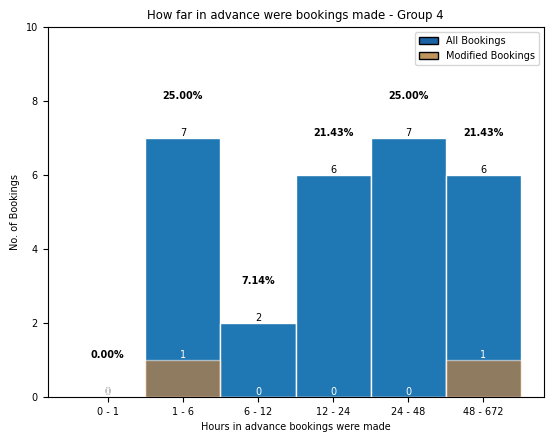

In [19]:
# Booking pattern for group 4

# How far in advance was a booking made in hours?
g4Bookings['diff'] = (g4Bookings['start'] - g4Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g4Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g4Bookings['diff'].where(g4Bookings['modified_at'] > g4Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 4")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g4Bookings)
print(total_bookings, 'bookings were made by Group 4.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 4 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

array([[<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>],
       [<Axes: title={'center': '28'}>, <Axes: >]], dtype=object)

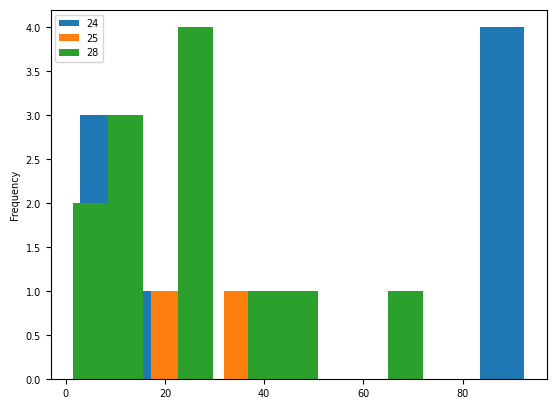

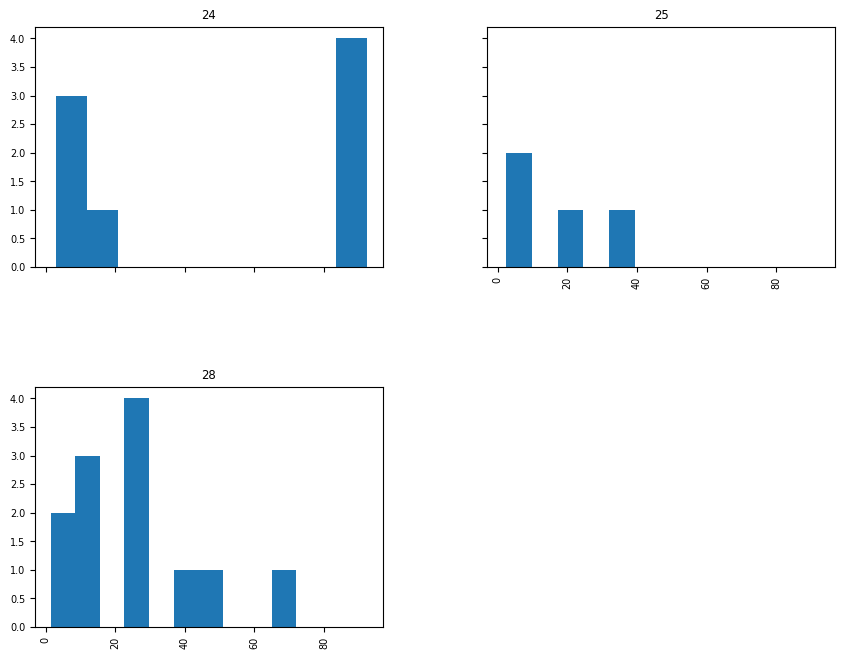

In [30]:
pp = g4Bookings.groupby('user')['diff']
# ff = pp.agg({'measurement':'count'})
pp.plot.hist(legend=True)


g4Bookings['diff'].hist(by=g4Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [25]:
# In cases where a booking was made in advance - an hour or more in advance - does the weather forecast change significantly when it is time for the activity?

advance_bookings = allBookings.where(allBookings['diff'] >= 1).dropna().copy()
# advance_bookings

# Populating the forecast value at creation
for index, row in advance_bookings.iterrows():
    rounded_minute = row['created_at'].minute - row['created_at'].minute % 15
    
    rounded_created_at = datetime.datetime(
            row['created_at'].year,
            row['created_at'].month,
            row['created_at'].day,
            row['created_at'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['created_at'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.time != rounded_created_at.strftime('%Y-%m-%dT%H:%M:%SZ')].index)
    data = data.drop(data[data.minutes_offset < 0].index)
    
    minutes_offset = ((row['start'] - row['created_at']).total_seconds())/60
    
    for data_index, data_row in data.iterrows():
        
        # Getting the closest minutes offset value
        data['absolute_difference'] = np.abs(data['minutes_offset'] - minutes_offset)
        closest_index = data['absolute_difference'].idxmin()
        solar_value_at_creation = data.loc[closest_index, 'value']
        
#         print(f"Closest solar value to {minutes_offset}: {solar_value_at_creation}")
        advance_bookings.loc[advance_bookings['created_at'] == row['created_at'], 'solar_value_at_creation'] = solar_value_at_creation            
  
advance_bookings['solar_value_at_creation'].fillna(0, inplace=True)

      
    
# Populating the forecast value at time of activity
for index, row in advance_bookings.iterrows():
    rounded_minute = row['start'].minute - row['start'].minute % 15
    
    rounded_start_at = datetime.datetime(
            row['start'].year,
            row['start'].month,
            row['start'].day,
            row['start'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['start'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    for data_index, data_row in data.iterrows():
        data_row['time'] = data_row['time'].replace('T',' ').replace('Z','')
        data_row['time'] = datetime.datetime.strptime(data_row['time'], "%Y-%m-%d %H:%M:%S")

        if data_row['time'] == rounded_start_at:
            advance_bookings.loc[advance_bookings['start'] == row['start'], 'solar_value_at_start'] = data_row['value'] 
            
advance_bookings['solar_value_at_start'].fillna(0, inplace=True)

# Calculate the differences between 'solar_value_at_start' and 'solar_value_at_creation'
advance_bookings['solar_value_differences'] = advance_bookings['solar_value_at_start'] - advance_bookings['solar_value_at_creation']

# Remove bookings where forecast value was not found because the timestamp does not exist in the forecast data
# Likely because they are right on the cusp of the 15 min window and the value used is likely from the previous window
advance_bookings = advance_bookings.drop(advance_bookings[advance_bookings.solar_value_at_creation == 0].index)
advance_bookings = advance_bookings.drop(advance_bookings[advance_bookings.solar_value_at_start == 0].index)

with pd.option_context('display.max_rows', None):
    display(advance_bookings)

# display(advance_bookings)

# Mean
mean_difference = np.mean(advance_bookings['solar_value_differences'])
print("Mean Difference between 'solar_value_at_start' and 'solar_value_at_creation':", mean_difference)

# Median
median_difference = np.median(advance_bookings['solar_value_differences'])
print("Median Difference between 'solar_value_at_start' and 'solar_value_at_creation':", median_difference)

# Standard deviation
std_deviation = np.std(advance_bookings['solar_value_differences'])
print("Standard Deviation:", std_deviation)

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff,solar_value_at_creation,solar_value_at_start,solar_value_differences
34,2023-04-21 08:30:00+00:00,5400.0,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8.0,electricity_consumption,10.0,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,3.237778,275.0,275.0,0.0
35,2023-04-21 17:00:00+00:00,1800.0,oven (the oven is on and also the computer and...,,no,0.78,11.0,electricity_consumption,12.0,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00,8.234167,279.0,150.0,-129.0
41,2023-04-22 11:20:00+00:00,7200.0,oven (baking),,no,0.46,10.0,electricity_consumption,11.0,2023-04-22 08:43:48+00:00,2023-04-22 08:43:48+00:00,2.603333,701.0,958.0,257.0
43,2023-04-22 16:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00,6.018056,752.0,232.0,-520.0
44,2023-04-23 18:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,evening roast,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:00:48+00:00,2023-04-22 11:00:48+00:00,30.986667,73.0,117.0,44.0
45,2023-04-23 13:15:00+00:00,7200.0,oven (baking),actually charging my van and not baking,somewhat,0.46,10.0,electricity_consumption,11.0,2023-04-23 12:13:16+00:00,2023-04-23 12:13:16+00:00,1.028889,371.0,364.0,-7.0
47,2023-04-24 14:00:00+00:00,7200.0,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8.0,electricity_consumption,10.0,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,4.301111,344.0,483.0,139.0
48,2023-04-25 08:00:00+00:00,3600.0,toaster,,no,0.13,11.0,electricity_consumption,12.0,2023-04-24 12:59:00+00:00,2023-04-24 12:59:00+00:00,19.016667,2055.0,2247.0,192.0
51,2023-04-25 16:00:00+00:00,3600.0,meal_dinner,,no,0.94,8.0,electricity_consumption,10.0,2023-04-25 10:02:05+00:00,2023-04-25 10:02:05+00:00,5.965278,820.0,326.0,-494.0
54,2023-04-29 10:30:00+00:00,9000.0,dishwasher,,somewhat,0.12,11.0,electricity_consumption,12.0,2023-04-26 16:23:53+00:00,2023-04-26 16:23:53+00:00,66.101944,690.0,2960.0,2270.0


Mean Difference between 'solar_value_at_start' and 'solar_value_at_creation': 5.117924528301887
Median Difference between 'solar_value_at_start' and 'solar_value_at_creation': -15.0
Standard Deviation: 754.5650504357383


In [11]:
# Do people always book when it's most sunny - at the peak?

advance_bookings = allBookings.where(allBookings['diff'] >= 1).dropna().copy()
advance_bookings

# Populating the time stamp of peak solar generation
for index, row in advance_bookings.iterrows():
    rounded_minute = row['created_at'].minute - row['created_at'].minute % 15
    
    rounded_created_at = datetime.datetime(
            row['created_at'].year,
            row['created_at'].month,
            row['created_at'].day,
            row['created_at'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['created_at'].strftime('%Y-%m-%d') + ".csv"
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    peak_solar_value = max(data['value'])
    peak_time = data.loc[data['value'] == peak_solar_value, 'time'].iloc[0]
    advance_bookings.at[index, 'peak_time'] = pd.to_datetime(peak_time,format='%Y-%m-%d %H:%M:%S')

# Calculate the time range of +- 2 hour
peak_start = advance_bookings['peak_time'] - pd.Timedelta(hours=2)
peak_end = advance_bookings['peak_time'] + pd.Timedelta(hours=2)

# Compare
advance_bookings['booked_at_peak'] = (peak_start <= advance_bookings['start']) & \
                                      (advance_bookings['start'] <= peak_end)

# Count the number of bookings that were booked at the peak time range
booked_at_peak = advance_bookings['booked_at_peak'].sum()

print("Number of bookings made at peak time:", booked_at_peak)
print("Total Number of bookings:", len(advance_bookings.index))
# display(advance_bookings)
#     peak_range = peak_time +- 1 hour

Number of bookings made at peak time: 67
Total Number of bookings: 251


In [20]:
#all modified bookings

modified_bookings = allBookings.where(allBookings['modified_at'] > allBookings['created_at']).dropna().copy()
modified_bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
34,2023-04-21 08:30:00+00:00,5400.0,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8.0,electricity_consumption,10.0,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,3.237778
43,2023-04-22 16:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00,6.018056
47,2023-04-24 14:00:00+00:00,7200.0,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8.0,electricity_consumption,10.0,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,4.301111
55,2023-04-27 11:00:00+00:00,7200.0,washing_and_drying (Breakfast. Kettle. Toaster.),,yes,1.13,8.0,electricity_consumption,10.0,2023-04-27 08:49:51+00:00,2023-04-27 07:47:22+00:00,3.210556
57,2023-04-28 13:00:00+00:00,5400.0,dishwasher (This is the end of the dishwasher ...,,somewhat,0.50,8.0,electricity_consumption,10.0,2023-04-28 07:18:43+00:00,2023-04-28 05:16:29+00:00,7.725278
60,2023-04-28 15:30:00+00:00,1800.0,oven (baking),,yes,0.46,10.0,electricity_consumption,11.0,2023-04-28 15:27:09+00:00,2023-04-28 12:26:11+00:00,3.063611
61,2023-04-29 10:00:00+00:00,3600.0,meal_dinner,This is for using the vacuum cleaner but it w...,yes,0.94,8.0,electricity_consumption,10.0,2023-04-28 16:42:44+00:00,2023-04-28 15:41:05+00:00,18.315278
62,2023-04-29 12:15:00+00:00,3600.0,washing_and_drying,,no,0.29,10.0,electricity_consumption,11.0,2023-04-29 08:20:37+00:00,2023-04-29 06:19:59+00:00,5.916944
72,2023-04-30 09:00:00+00:00,10800.0,other (charging EV &amp; using hob),,yes,1.38,10.0,electricity_consumption,11.0,2023-04-29 18:53:00+00:00,2023-04-29 17:52:32+00:00,15.124444
77,2023-04-30 12:00:00+00:00,1800.0,other (charging EV &amp; using hob),EV,yes,1.38,10.0,electricity_consumption,11.0,2023-04-30 09:54:45+00:00,2023-04-30 06:50:01+00:00,5.166389


In [21]:
# What was the solar forecast when the booking was made

for index, row in modified_bookings.iterrows():
    rounded_minute = row['created_at'].minute - row['created_at'].minute % 15
    
    rounded_created_at = datetime.datetime(
            row['created_at'].year,
            row['created_at'].month,
            row['created_at'].day,
            row['created_at'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['created_at'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    for data_index, data_row in data.iterrows():
        data_row['time'] = data_row['time'].replace('T',' ').replace('Z','')
        data_row['time'] = datetime.datetime.strptime(data_row['time'], "%Y-%m-%d %H:%M:%S")

        if data_row['time'] == rounded_created_at:
            modified_bookings.loc[modified_bookings['created_at'] == row['created_at'], 'solar_value_at_creation'] = data_row['value']            

# print(modified_bookings)
display(modified_bookings)

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff,solar_value_at_creation
34,2023-04-21 08:30:00+00:00,5400.0,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8.0,electricity_consumption,10.0,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,3.237778,NaN
43,2023-04-22 16:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00,6.018056,2352.0
47,2023-04-24 14:00:00+00:00,7200.0,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8.0,electricity_consumption,10.0,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,4.301111,1051.0
55,2023-04-27 11:00:00+00:00,7200.0,washing_and_drying (Breakfast. Kettle. Toaster.),,yes,1.13,8.0,electricity_consumption,10.0,2023-04-27 08:49:51+00:00,2023-04-27 07:47:22+00:00,3.210556,624.0
57,2023-04-28 13:00:00+00:00,5400.0,dishwasher (This is the end of the dishwasher ...,,somewhat,0.50,8.0,electricity_consumption,10.0,2023-04-28 07:18:43+00:00,2023-04-28 05:16:29+00:00,7.725278,NaN
60,2023-04-28 15:30:00+00:00,1800.0,oven (baking),,yes,0.46,10.0,electricity_consumption,11.0,2023-04-28 15:27:09+00:00,2023-04-28 12:26:11+00:00,3.063611,374.0
61,2023-04-29 10:00:00+00:00,3600.0,meal_dinner,This is for using the vacuum cleaner but it w...,yes,0.94,8.0,electricity_consumption,10.0,2023-04-28 16:42:44+00:00,2023-04-28 15:41:05+00:00,18.315278,250.0
62,2023-04-29 12:15:00+00:00,3600.0,washing_and_drying,,no,0.29,10.0,electricity_consumption,11.0,2023-04-29 08:20:37+00:00,2023-04-29 06:19:59+00:00,5.916944,871.0
72,2023-04-30 09:00:00+00:00,10800.0,other (charging EV &amp; using hob),,yes,1.38,10.0,electricity_consumption,11.0,2023-04-29 18:53:00+00:00,2023-04-29 17:52:32+00:00,15.124444,88.0
77,2023-04-30 12:00:00+00:00,1800.0,other (charging EV &amp; using hob),EV,yes,1.38,10.0,electricity_consumption,11.0,2023-04-30 09:54:45+00:00,2023-04-30 06:50:01+00:00,5.166389,1233.0


In [22]:
# What was the solar forecast when the booking was modified

for index, row in modified_bookings.iterrows():
    rounded_minute = row['modified_at'].minute - row['modified_at'].minute % 15
    
    rounded_modified_at = datetime.datetime(
            row['modified_at'].year,
            row['modified_at'].month,
            row['modified_at'].day,
            row['modified_at'].hour,
            rounded_minute, 
            0)

    modification_forecast = "../ec_data/solar_export/" + row['modified_at'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(modification_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    for forecast_index, forecast_row in data.iterrows():
        forecast_row['time'] = forecast_row['time'].replace('T',' ').replace('Z','')
        forecast_row['time'] = datetime.datetime.strptime(forecast_row['time'], "%Y-%m-%d %H:%M:%S")

        if forecast_row['time'] == rounded_modified_at:
            modified_bookings.loc[modified_bookings['modified_at'] == row['modified_at'], 'solar_value_at_modification'] = forecast_row['value']            

display(modified_bookings)

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff,solar_value_at_creation,solar_value_at_modification
34,2023-04-21 08:30:00+00:00,5400.0,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8.0,electricity_consumption,10.0,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,3.237778,NaN,190.0
43,2023-04-22 16:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00,6.018056,2352.0,666.0
47,2023-04-24 14:00:00+00:00,7200.0,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8.0,electricity_consumption,10.0,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,4.301111,1051.0,381.0
55,2023-04-27 11:00:00+00:00,7200.0,washing_and_drying (Breakfast. Kettle. Toaster.),,yes,1.13,8.0,electricity_consumption,10.0,2023-04-27 08:49:51+00:00,2023-04-27 07:47:22+00:00,3.210556,624.0,287.0
57,2023-04-28 13:00:00+00:00,5400.0,dishwasher (This is the end of the dishwasher ...,,somewhat,0.50,8.0,electricity_consumption,10.0,2023-04-28 07:18:43+00:00,2023-04-28 05:16:29+00:00,7.725278,NaN,177.0
60,2023-04-28 15:30:00+00:00,1800.0,oven (baking),,yes,0.46,10.0,electricity_consumption,11.0,2023-04-28 15:27:09+00:00,2023-04-28 12:26:11+00:00,3.063611,374.0,266.0
61,2023-04-29 10:00:00+00:00,3600.0,meal_dinner,This is for using the vacuum cleaner but it w...,yes,0.94,8.0,electricity_consumption,10.0,2023-04-28 16:42:44+00:00,2023-04-28 15:41:05+00:00,18.315278,250.0,177.0
62,2023-04-29 12:15:00+00:00,3600.0,washing_and_drying,,no,0.29,10.0,electricity_consumption,11.0,2023-04-29 08:20:37+00:00,2023-04-29 06:19:59+00:00,5.916944,871.0,1942.0
72,2023-04-30 09:00:00+00:00,10800.0,other (charging EV &amp; using hob),,yes,1.38,10.0,electricity_consumption,11.0,2023-04-29 18:53:00+00:00,2023-04-29 17:52:32+00:00,15.124444,88.0,63.0
77,2023-04-30 12:00:00+00:00,1800.0,other (charging EV &amp; using hob),EV,yes,1.38,10.0,electricity_consumption,11.0,2023-04-30 09:54:45+00:00,2023-04-30 06:50:01+00:00,5.166389,1233.0,2293.0


In [24]:
#modified bookings created 6-12 hours in advance

# modified_bookings_6_12 = modified_bookings.where(modified_bookings['diff'] > 6).where(modified_bookings['diff'] < 12).dropna().copy()
# modified_bookings_6_12

In [19]:
# What propotion of modified booking were due to a change in weather?